In [1]:
import pandas as pd
import numpy as np

In [2]:
import MySQLdb
mysql_cn= MySQLdb.connect(host='127.0.0.1', 
                port=3306,user='root', passwd='0715sql', 
                db='tianchi')

In [3]:
train= pd.read_sql('select * from train_set;', con=mysql_cn)

In [4]:
test= pd.read_sql('select * from test_set;', con=mysql_cn)

In [5]:
mysql_cn.close()

In [6]:
train.shape

(345243, 206)

In [7]:
train.dtypes

user_id                 object
item_id                 object
item_category           object
buy                      int64
user_bh1_28d             int64
user_bh2_28d             int64
user_bh3_28d             int64
user_bh4_28d             int64
user_bh1_21d             int64
user_bh2_21d             int64
user_bh3_21d             int64
user_bh4_21d             int64
user_bh1_14d             int64
user_bh2_14d             int64
user_bh3_14d             int64
user_bh4_14d             int64
user_bh1_07d             int64
user_bh2_07d             int64
user_bh3_07d             int64
user_bh4_07d             int64
user_bh1_04d             int64
user_bh2_04d             int64
user_bh3_04d             int64
user_bh4_04d             int64
user_bh1_02d             int64
user_bh2_02d             int64
user_bh3_02d             int64
user_bh4_02d             int64
user_bh1_01d             int64
user_bh2_01d             int64
                        ...   
useritem_bh1_12h4        int64
useritem

In [8]:
test.shape

(345193, 205)

In [9]:
test.dtypes

user_id                 object
item_id                 object
item_category           object
user_bh1_28d             int64
user_bh2_28d             int64
user_bh3_28d             int64
user_bh4_28d             int64
user_bh1_21d             int64
user_bh2_21d             int64
user_bh3_21d             int64
user_bh4_21d             int64
user_bh1_14d             int64
user_bh2_14d             int64
user_bh3_14d             int64
user_bh4_14d             int64
user_bh1_07d             int64
user_bh2_07d             int64
user_bh3_07d             int64
user_bh4_07d             int64
user_bh1_04d             int64
user_bh2_04d             int64
user_bh3_04d             int64
user_bh4_04d             int64
user_bh1_02d             int64
user_bh2_02d             int64
user_bh3_02d             int64
user_bh4_02d             int64
user_bh1_01d             int64
user_bh2_01d             int64
user_bh3_01d             int64
                        ...   
useritem_bh1_12h4        int64
useritem

In [10]:
Y=train.loc[:,"buy"].astype("category")
X=train.iloc[:,4:206]

In [11]:
F=test.iloc[:,3:205]

In [12]:
train.groupby("buy").mean()

,user_bh1_28d,user_bh2_28d,user_bh3_28d,user_bh4_28d,user_bh1_21d,user_bh2_21d,user_bh3_21d,user_bh4_21d,user_bh1_14d,user_bh2_14d,...,useritem_recent_bh1,useritem_recent_bh2,useritem_recent_bh3,useritem_recent_bh4,user_12rate,user_13rate,user_14rate,cat_12rate,cat_13rate,cat_14rate
buy,,,,,,,,,,,,,,,,,,,,,
0,2893.673289,105.782068,78.981674,19.902987,2171.198421,80.734024,58.819317,14.759347,1412.974199,52.678348,...,326.673391,963.040227,958.715481,986.767277,0.023822,0.029384,0.009408,0.024071,0.029196,0.009211
1,1928.941748,20.339806,79.184466,21.019417,1501.446602,15.058252,63.621359,15.786408,1137.553398,10.854369,...,66.592233,936.504854,438.019417,900.543689,0.009275,0.044224,0.012703,0.022665,0.047995,0.017346


In [23]:
X_features=list(X.columns.values)

In [22]:
from sklearn import tree


In [43]:
clf=tree.DecisionTreeClassifier(class_weight={0:1,1:20})
#思路：
#增加变量，抽样，集成，参数修剪，新的算法

In [44]:
clf=clf.fit(X,Y)

In [26]:
from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image



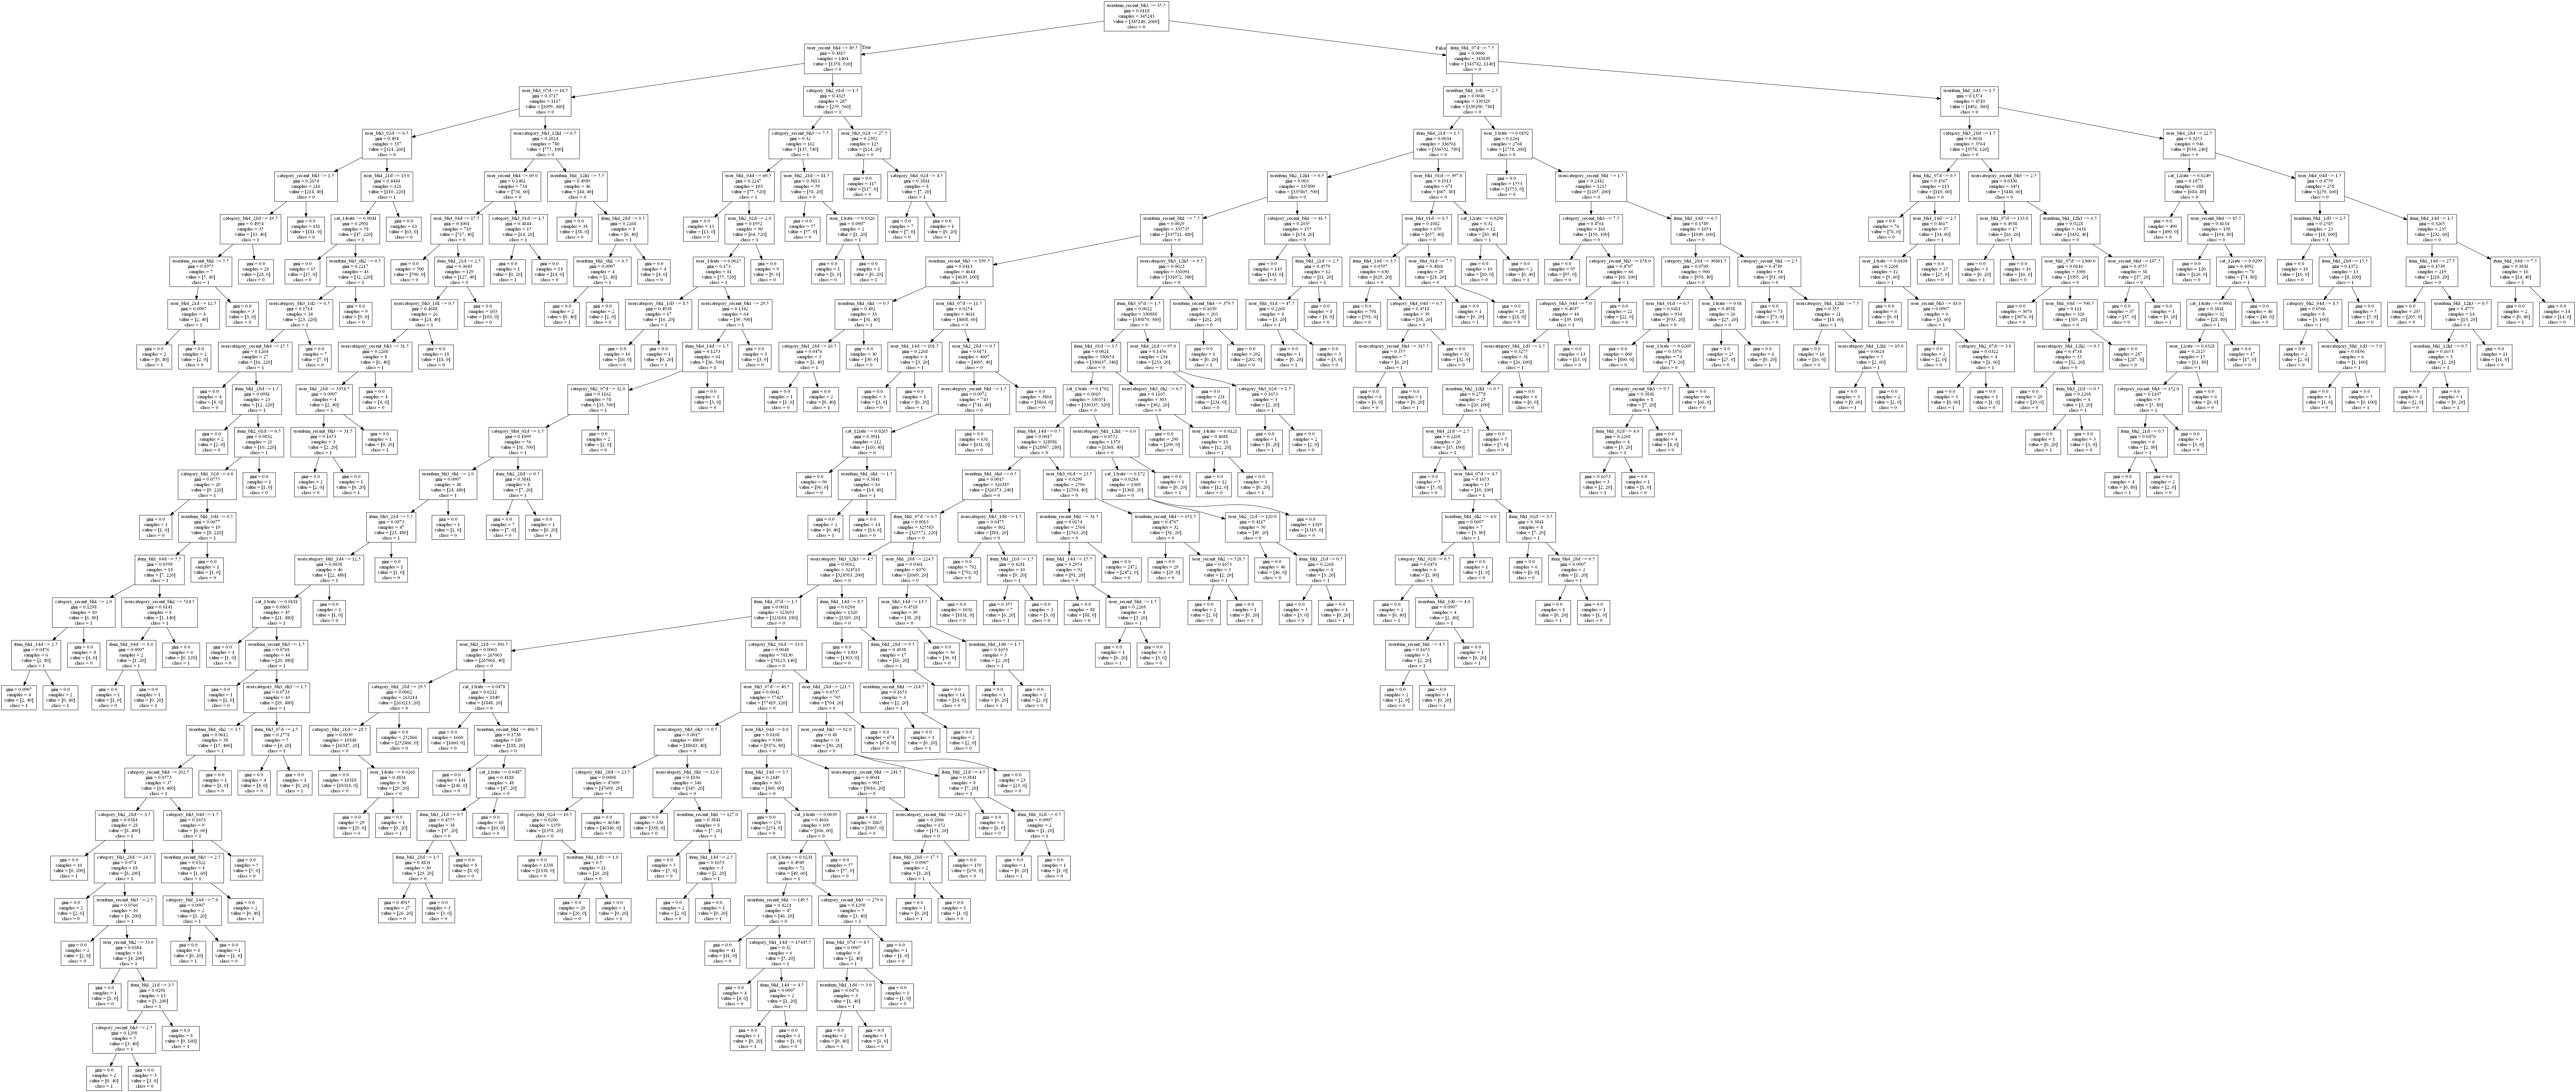

In [40]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,feature_names=X_features,class_names=["0","1"])
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [46]:
p=clf.predict(F)

In [47]:
f=test[["user_id","item_id"]][p==1]
res=f
res.iloc[:,0]=f.iloc[:,0].astype("string")
res.iloc[:,1]=f.iloc[:,1].astype("string")
res.to_csv("C:/data science/race and projects/tianchi/tianchi_mobile_recommendation_predict.csv",index=False,encoding="UTF-8")